In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Primero debemos comparar entre el dataset limpio sin NaN values (sin null) y con, y tratar de observar si existe alguna posibilidad de rellenar campos para asi tener un mayor registro.

datos_completos = pd.read_excel("/content/drive/MyDrive/IE/proyecto/Datasets Coches_2_mano.xlsx")
datos_completos

,url,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date
0,e158ae0ca53119ca199c28c36b5c2fcd,SEAT,Toledo,SEAT Toledo 4p.,950.0,NaN,DiŽsel,2000.0,227000.0,NaN,4.0,Manual,Verde,5.0,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:00
1,ff267ebb7e700246f47f84f3db660b4b,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200.0,NaN,Gasolina,2017.0,50071.0,82.0,5.0,Manual,Blanco,6.0,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:00
2,de4b02db28ea7786c622b969be10c7c7,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851.0,7024.0,DiŽsel,2016.0,103000.0,100.0,4.0,Manual,Blanco,10.0,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:00
3,0449972a4d07594acf92e9a7dd28b39c,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426.0,NaN,DiŽsel,2014.0,120000.0,140.0,4.0,Manual,Blanco,9.0,True,Inniauto,Navarra,Spain,2020-11-25 11:09:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850.0,22800.0,DiŽsel,2017.0,107000.0,130.0,2.0,Manual,Blanco,4.0,True,"Autofleet Espa–a,s.l",Sevilla,Spain,2021-01-12 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490.0,16490.0,Gasolina,2018.0,47000.0,140.0,5.0,Autom‡tico,Gris / Plata,26.0,True,Flexicar M‡laga,M‡laga,Spain,2020-11-24 19:59:00
49996,732b04fb47dd9559dbdcd099c5af484e,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500.0,13551.0,DiŽsel,2015.0,68750.0,150.0,2.0,Manual,KNG Gris Casiopea (metalizado),30.0,True,Ocasion Plus,M‡laga,Spain,2021-01-13 17:02:00
49997,c10afb53957fb8012707239bdfa66018,PEUGEOT,108.0,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000.0,9000.0,Gasolina,2019.0,21422.0,72.0,5.0,Manual,Gris / Plata,17.0,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:00
49998,f74363a6688ba11b71b4d980a959b8d3,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900.0,NaN,Gasolina,2013.0,47900.0,450.0,5.0,Autom‡tico,Gris / Plata (Antracita),20.0,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:00


In [4]:
datos_completoss = datos_completos.copy()

**Tratamiento de price_financed**

In [5]:
## Observamos que price_financed tiene muchos valores vacios pero vemos que su precio siempre esta completo
  # Soluciones: pondremos la misma cantidad a aquellos que este vacio que su precio normal price == price_financed 
a = datos_completoss.isna().sum()
print(a,"\n")
datos_completoss["price_financed"].fillna(datos_completoss["price"],inplace=True) ####################################### poner Bien
d = datos_completoss.isna().sum()
print(d)
print("\n ANTES {0} - DESPUES {1}".format(a.sum(),d.sum()))

url                    0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
dtype: int64 

url                   0
make                  2
model                 5
version               0
price                 0
price_financed        0
fuel                 46
year                  2
kms                   0
power              8528
doors                 0
shift               111
color               594
photos                0
is_professional       0
dealer                0
province              6
country               0
publish_date          0
dtype: int64

 ANTES 35731 - DESPUES 9294


**Tratamiento de power**

In [6]:
datos_completoss[["power","version"]]

,power,version
0,NaN,SEAT Toledo 4p.
1,82.0,CITROEN C1 PureTech 60KW 82CV Feel 5p.
2,100.0,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...
3,140.0,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...
4,130.0,FORD Transit 350 96kW L4 Ambiente Propulsion T...
...,...,...
49995,140.0,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.
49996,150.0,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...
49997,72.0,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.
49998,450.0,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.


In [7]:
## En el atributo version observamos una breve descripcion del coche obteniendo el model,make,doors y power que cada coche tiene
  # Desgraciadamente no se obtiene ninguna informacion a partir de las version de cada coche para poder asignarle al campo power algun valor por ello pasaremos a eliminar aquellos que sean NaN
print(datos_completoss["power"].isna().sum(),"\n")
datos_completoss[datos_completoss["power"].isna()][:100] ####TODO: asignar media
datos_completoss["power"].fillna(datos_completoss["power"].mean(),inplace= True)
print(datos_completoss["power"].mean())
datos_completoss[["power"]]

8528 

146.3963879243918


,power
0,146.396388
1,82.000000
2,100.000000
3,140.000000
4,130.000000
...,...
49995,140.000000
49996,150.000000
49997,72.000000
49998,450.000000


**Tratamiento de fuel**

In [8]:
## Decidiremos dar a dichos coches los valores mas usuales segun su modelo y proveedor
  # pero tras observar que no existe demasiada exactitud se ha decidido mejor eliminar los casos ya que afectan poco al dataset (46 casos)
####TODO: decir arreglar el dataset o hacer web scraping falta tiempo
datos_completoss[datos_completoss["fuel"].isna()==False]
datos_completoss[datos_completoss["model"].str.contains("Serie", na=False) ][["fuel","model"]].value_counts()
datos_completoss["fuel"].dropna(inplace=True)


**Tratamiento de shift**

In [9]:
## Formateo Automatico y Manual: 
  # No funciona bien
ls=datos_completoss["shift"].value_counts().index
# datos_completoss["shift"].replace(ls[1],"Automatico")
datos_completoss["shift"].value_counts()

Manual        34687
Autom‡tico    15202
Name: shift, dtype: int64

In [10]:
## Decidiremos dar a dichos coches los valores mas usuales segun su modelo y proveedor
  # En este caso si logramos observar una mejor relacion para poder aplicarlo para ello dividiremos el num de casos del modelo de la siguiente forma:
    #   COUNT_MODELO_MANUAL / COUNT_MODELO_TODOS  == si es >restriccion_manual =  Manual 
    #                                                si es <restriccion_automatico = Automatico, ELSE  NaN
def mejora_shift(dataframe,restriccion_manual=2/3,restriccion_automatico = 1/3):
  set_modelos_nan = set(dataframe[dataframe["shift"].isna()].value_counts("model").index)
  lista_malos = []
  for i in set_modelos_nan:
    cuentas = dataframe[(dataframe["model"] == i) & (dataframe["model"] != np.nan)][["shift","model"]].value_counts() ## no contamos los NaN
    try:
      indices_modelo = dataframe[(dataframe["model"] == i) & (dataframe["shift"].isna())]["shift"].index.tolist()
      prop = cuentas.Manual /cuentas.sum()

      if float(prop) > restriccion_manual:
        dataframe.loc[indices_modelo,["shift"]] = ["Manual"]

      elif float(prop) < restriccion_automatico:
        dataframe.loc[indices_modelo,["shift"]] = ["Autom‡tico"]

      else:
        print("Se queda igual: ",i)
        print(cuentas,"\n")
        lista_malos.append(i)


    except:
      dataframe.loc[indices_modelo,["shift"]] = ["Autom‡tico"] #automatico por que si manual = 0 peta prop si automatico = 0 sera 1 entonces cambia a manual
  print(lista_malos,)
mejora_shift(datos_completoss)
print("Nulos que quedan: ",datos_completoss["shift"].isna().sum())

Se queda igual:  Serie 2 Gran Tourer
shift       model              
Autom‡tico  Serie 2 Gran Tourer    53
Manual      Serie 2 Gran Tourer    48
dtype: int64 

Se queda igual:  CX-5
shift       model
Manual      CX-5     60
Autom‡tico  CX-5     36
dtype: int64 

Se queda igual:  X1
shift       model
Autom‡tico  X1       140
Manual      X1       134
dtype: int64 

Se queda igual:  A4
shift       model
Manual      A4       586
Autom‡tico  A4       359
dtype: int64 

Se queda igual:  Optima
shift       model 
Autom‡tico  Optima    12
Manual      Optima    10
dtype: int64 

Se queda igual:  Voyager
shift       model  
Manual      Voyager    23
Autom‡tico  Voyager    16
dtype: int64 

Se queda igual:  X3
shift       model
Autom‡tico  X3       140
Manual      X3        79
dtype: int64 

Se queda igual:  XCeed
shift       model
Manual      XCeed    38
Autom‡tico  XCeed    22
dtype: int64 

Se queda igual:  Serie 3
shift       model  
Manual      Serie 3    873
Autom‡tico  Serie 3    502
dtype

In [11]:
## Eliminamos los elementos nulos de shift
datos_completoss["shift"].dropna(inplace=True)

In [12]:
# MALLLLLLL arriba bien
# set_modelos_nan = set(datos_completoss[datos_completoss["shift"].isna()].value_counts("model").index)

# print(set_modelos_nan)

# # def calcula_modelo_shift(dataframe):

# for i in set_modelos_nan:
#   # automaticos = datos_completoss[datos_completoss["model"].str.contains(i, na=False) ][["shift","model"]].value_counts().Automatico
#   cuentas = datos_completoss[(datos_completoss["model"] == i) & (datos_completoss["model"] != np.nan)][["shift","model"]].value_counts() ## no contamos los NaN
#   print(cuentas)
#   try:
#     prop = cuentas.Manual /cuentas.sum()
#     # print(dataframe[dataframe["model"]==i]["shift"])
    
#     if float(prop) > 2/3:
#       datos_completoss[(datos_completoss["model"]==i) & (datos_completoss["shift"].isna())]["shift"].fillna("Manual",inplace=True)
#       print(dataframe[dataframe["model"]==i][["shift","model"]])
#       break
#     elif float(prop) < 1/3:
#       # datos_completoss[datos_completoss["model"]==i]["shift"].fillna("Automatico",inplace=True)
#       datos_completoss[(datos_completoss["model"]==i) & (datos_completoss["shift"].isna())]["shift"].fillna("Automatico",inplace=True)


#     else:
#       print("hola")
#       print(i)

#   except:
#     print("puta")
#     datos_completoss[datos_completoss["model"]==i]["shift"].fillna("Automatico",inplace=True)

# datos_completoss[datos_completoss["shift"].isna()][["shift","model"]]

# # calcula_modelo_shift(datos_completoss)

# # print(set_modelos_nan)
# # a = float(datos_completoss[datos_completoss["model"].str.contains("KA", na=False) ][["shift","model"]].value_counts().Manual)/datos_completoss[datos_completoss["model"].str.contains("KA", na=False) ][["shift","model"]].value_counts().sum()
# # a > 2/3

**Tratamiento de color**

In [13]:
## En cuanto al contenido de colores no disponemos de alguna informacion extra para poder obtener mas valores.
  # Para precisar mas sobre esta propiedad podremos o hacer web scraping para arreglar el dataset o tomar otro dataset mejor informado.
    # (tiene una gran cantidad de tipos)
datos_completoss["color"].dropna(inplace=True)

**Tratamiento year**

In [14]:
## Para el campo year eliminaremos los valores NaN
datos_completoss["year"].dropna(inplace=True)
a = datos_completoss.isna().sum()
print(a,"\n")

url                  0
make                 2
model                5
version              0
price                0
price_financed       0
fuel                46
year                 2
kms                  0
power                0
doors                0
shift               12
color              594
photos               0
is_professional      0
dealer               0
province             6
country              0
publish_date         0
dtype: int64 



In [15]:
datos_completoss.dropna(subset=["year","color","shift","model","fuel","make"],inplace=True)

**Conclusion**

In [16]:
datos = pd.read_excel("/content/drive/MyDrive/IE/proyecto/Datasets Coches_2_mano.xlsx",).dropna()
datos

,url,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date
2,de4b02db28ea7786c622b969be10c7c7,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851.0,7024.0,DiŽsel,2016.0,103000.0,100.0,4.0,Manual,Blanco,10.0,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850.0,22800.0,DiŽsel,2017.0,107000.0,130.0,2.0,Manual,Blanco,4.0,True,"Autofleet Espa–a,s.l",Sevilla,Spain,2021-01-12 20:00:00
5,f15e9a256de698bf0588753e7add0fdf,PEUGEOT,3008.0,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490.0,10490.0,Gasolina,2016.0,78665.0,130.0,5.0,Manual,Blanco,32.0,True,Flexicar Rivas,Madrid,Spain,2021-01-08 17:03:00
6,517b8f7c488d9d4645f76b1611418a4e,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...,28500.0,26220.0,DiŽsel,2017.0,36238.0,150.0,5.0,Autom‡tico,Blanco,47.0,True,OK Cars,Baleares,Spain,2021-01-12 11:26:00
10,24493d316fdbd736dab7162c09f9d582,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv.BlueHDi 74...,13900.0,12900.0,DiŽsel,2017.0,81000.0,100.0,5.0,Manual,Gris / Plata,21.0,True,Autom—viles Emilio,Murcia,Spain,2021-01-07 19:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2b9bb09716f01a9496f08805dc09c08e,SEAT,Le—n,SEAT Leon ST 1.8 TSI 132kW 180CV StSp FR Plus 5p.,19490.0,18490.0,Gasolina,2017.0,67900.0,180.0,5.0,Manual,Blanco,34.0,True,Flexicar Barcelona,Barcelona,Spain,2020-12-23 19:53:00
49994,f6caffb1207bc61d62baa2759cd0a10b,SEAT,Le—n,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590.0,16590.0,DiŽsel,2019.0,21153.0,115.0,5.0,Manual,Gris / Plata,20.0,True,Das Weltauto Gil Automocion,Madrid,Spain,2021-01-14 19:20:00
49995,730210734bfbe1d3df878d5df71246f2,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490.0,16490.0,Gasolina,2018.0,47000.0,140.0,5.0,Autom‡tico,Gris / Plata,26.0,True,Flexicar M‡laga,M‡laga,Spain,2020-11-24 19:59:00
49996,732b04fb47dd9559dbdcd099c5af484e,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500.0,13551.0,DiŽsel,2015.0,68750.0,150.0,2.0,Manual,KNG Gris Casiopea (metalizado),30.0,True,Ocasion Plus,M‡laga,Spain,2021-01-13 17:02:00


In [17]:
## Comparamos la primera version del dataset donde eliminamos todos los elementos vacios con la nueva version donde hemos tratado los valores vacios.

antes =  len(datos.iloc[0:])
antes
print(antes,"\n")
despues = len(datos_completoss.iloc[0:])
print(despues)
print("\n ANTES {0} - DESPUES {1}".format(a.sum(),d.sum()))

23336 

49342

 ANTES 667 - DESPUES 9294


# Analisis Grafico

In [18]:
datos = datos_completoss.copy()

Index(['price', 'price_financed', 'year', 'kms', 'power', 'doors', 'photos'], dtype='object')


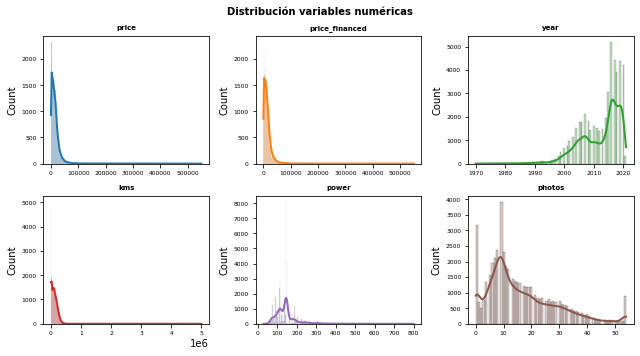

In [19]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
print(columnas_numeric)
# columnas_numeric = columnas_numeric.drop('is_professional',axis=1)
columnas_numeric = columnas_numeric.drop('doors')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

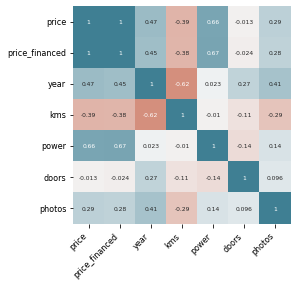

In [20]:
# Heatmap matriz de correlaciones
# ==============================================================================
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
# corr_matrix = corr_matrix.drop('is_professional')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [21]:
datos.select_dtypes(include=['object']).columns

Index(['url', 'make', 'model', 'version', 'fuel', 'shift', 'color', 'dealer',
       'province', 'country'],
      dtype='object')

IndexError: ignored

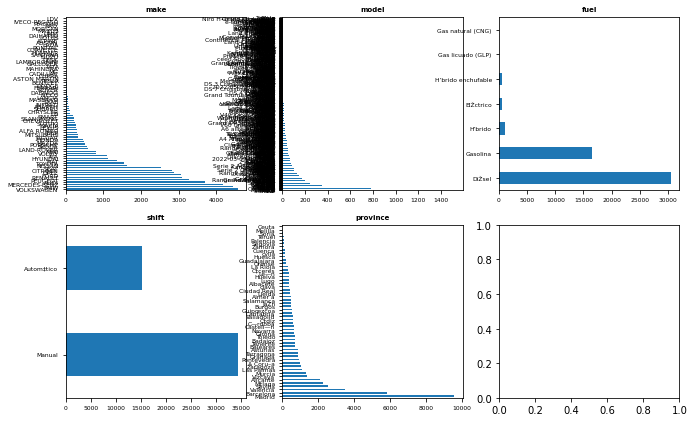

In [22]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 7))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('url')
columnas_object = columnas_object.drop('version')
columnas_object = columnas_object.drop('color')
columnas_object = columnas_object.drop('dealer')
columnas_object = columnas_object.drop('country')




for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

### Proporcion kilometros año

In [ ]:
datos["media_precio"] = (datos["price"]+datos["price_financed"])/2
datos["media_precio"]

In [ ]:
datos["prop_kms_year"] = datos["kms"]/datos["media_precio"]
datos["prop_kms_year"]

In [ ]:
# Dispersion que existe entre los datos segun el modelo y precio
sns.catplot(data=datos,x="make",y="price")

# Preprocesado


In [23]:
datos = datos_completoss.copy()

In [24]:
## Partimos de la siguiente fila con los atributos que vemos:
datos.iloc[[0]]

,url,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date
0,e158ae0ca53119ca199c28c36b5c2fcd,SEAT,Toledo,SEAT Toledo 4p.,950.0,950.0,DiŽsel,2000.0,227000.0,146.396388,4.0,Manual,Verde,5.0,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:00


In [25]:
print(len(datos.groupby("province").sum().index))
print(len(datos.groupby("color").sum().index))


52
3559


In [26]:
datos.groupby("color").sum().index

Index([                                                                 -12225.0,
       '"5CA 5CD 5DN 5DP 5DQ 5DR Pintura metalizada (excepto bronce magnÌ©tico)',
                                       '(( FULL, 4X4, NAVI, CALEFACTADOS, HK ))',
                                          '(( NACIONAL, FULL EXTRAS, BLU-RAY ))',
                                        '(( NACIONAL, IMPECABLE, FULL EXTRAS ))',
                                        '(( NACIONAL, LLANTA 21", PANORçMICO ))',
                                      '(( NACIONAL, S-LINE, LLANTA 22", FULL ))',
                                              '(( TODO EN FERRARI, IMPECABLE ))',
                                           '((( NACIONAL  CON  8.600 KM...  )))',
                                                       '(--EMBRAGUE ESTRENAR--)',
       ...
                                                 'pa08 Verde Guard (metalizado)',
                                               'pa09 Negro Grafito (metalizado)',
     

## Pruebas eliminando TODO

In [27]:
## Eliminamos datos no necesarios para el enetrenamiento como son:
##      url, fecha, dealer, provincia, color
datos_final = datos.drop('url',axis=1)                # no nos da informacion util para entrenar
datos_final = datos_final.drop('publish_date',axis=1) # 
datos_final = datos_final.drop('dealer',axis=1)       # disponemos del capo is_professional para ya saber si el dealer es una persona o una empresa
datos_final = datos_final.drop('province',axis=1)     # ####TODO: MIRAR SI QUITAR VALORES SE'ALADOS
datos_final = datos_final.drop('color',axis=1)        # Perdida de muchos datos a la hora de conseguir el set de colores (mirar celda anterior)
datos_final = datos_final.drop('country',axis=1)      # solo existe espa;a
datos_final = datos_final.drop('version',axis=1)      # valor categorica con demasiados tipos (se podria haber sacado tipo de coche si SPORT o algo asi o CV pero eso esta ya en power)

datos_final.set_index("make")                         

,model,price,price_financed,fuel,year,kms,power,doors,shift,photos,is_professional
make,,,,,,,,,,,
SEAT,Toledo,950.0,950.0,DiŽsel,2000.0,227000.0,146.396388,4.0,Manual,5.0,False
CITROEN,C1,6200.0,6200.0,Gasolina,2017.0,50071.0,82.000000,5.0,Manual,6.0,True
FORD,Transit Connect,7851.0,7024.0,DiŽsel,2016.0,103000.0,100.000000,4.0,Manual,10.0,True
VOLKSWAGEN,Caravelle,19426.0,19426.0,DiŽsel,2014.0,120000.0,140.000000,4.0,Manual,9.0,True
FORD,Transit,22850.0,22800.0,DiŽsel,2017.0,107000.0,130.000000,2.0,Manual,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...
HYUNDAI,i30,18490.0,16490.0,Gasolina,2018.0,47000.0,140.000000,5.0,Autom‡tico,26.0,True
RENAULT,Laguna,14500.0,13551.0,DiŽsel,2015.0,68750.0,150.000000,2.0,Manual,30.0,True
PEUGEOT,108.0,11000.0,9000.0,Gasolina,2019.0,21422.0,72.000000,5.0,Manual,17.0,True


In [28]:
print(datos_final.info())
datos_final["make"] = datos_final["make"].astype("category")
datos_final["model"] = datos_final["model"].astype("category")
datos_final["fuel"] = datos_final["fuel"].astype("category")
datos_final["shift"] = datos_final["shift"].astype("category")
print(datos_final.info())

datos_final["model"].unique() ## mirar la cantidad de calores posibles que dispone cada columna categorica

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49342 non-null  object 
 1   model            49342 non-null  object 
 2   price            49342 non-null  float64
 3   price_financed   49342 non-null  float64
 4   fuel             49342 non-null  object 
 5   year             49342 non-null  float64
 6   kms              49342 non-null  float64
 7   power            49342 non-null  float64
 8   doors            49342 non-null  float64
 9   shift            49342 non-null  object 
 10  photos           49342 non-null  float64
 11  is_professional  49342 non-null  bool   
dtypes: bool(1), float64(7), object(4)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           ---

['Toledo', 'C1', 'Transit Connect', 'Caravelle', 'Transit', ..., 'Corvette Stingray', 360.0, 'S2000', 'FF', 'Tribute']
Length: 934
Categories (934, object): ['Toledo', 'C1', 'Transit Connect', 'Caravelle', ..., 360.0, 'S2000', 'FF',
                           'Tribute']

### Disminucion variables categoricas 

**MODEL**

In [29]:
from numpy.ma.core import count
from pandas.core.algorithms import mode

## ESTUDIO DE LA ACEPTACION DE MODEL COMO COLUMNA:
  # pasamos de tener 600 tipos de modelos a 50 modelos mas relevantes (Relevante == aquellos modelos que mas hay en el dataset, esta bien la proporcion??)

modelos = datos_final[["model"]]
modelos_mas_importantes = list(modelos.value_counts().sort_values(ascending=False)[:50].index) ## lista de modelos relevantes
print(modelos_mas_importantes)

def transforma_modelo_relevante(modelo):
  modelos_mas_importantes = modelos.value_counts().sort_values(ascending=False)[:50].index
  if modelo in modelos_mas_importantes:
    return modelo
  else:
    return "No relevante"

datos_final["model"] = datos_final["model"].apply(transforma_modelo_relevante).astype("category")
datos_final["model"].value_counts()

[('Golf',), ('Serie 3',), ('A4',), ('A3',), ('Focus',), ('Clase C',), ('MŽgane',), ('Ibiza',), ('Astra',), ('Le—n',), ('Serie 1',), ('Passat',), ('QASHQAI',), ('MINI',), ('Serie 5',), ('Corsa',), ('Clio',), (308.0,), ('Clase A',), ('Polo',), ('Clase E',), ('Fiesta',), (500.0,), ('C3',), ('Insignia',), ('Mondeo',), ('A6',), ('C4',), ('Auris',), ('Touran',), (3008.0,), ('Berlingo',), ('A5',), ('X1',), ('Tiguan',), (208.0,), (2008.0,), ('ScŽnic',), ('Kuga',), ('Clase B',), ('X5',), ('Serie 4',), ('Arona',), (508.0,), ('Sportage',), ('JUKE',), ('X3',), ('TUCSON',), ('Partner',), ('Yaris',)]


No relevante    25457
Golf             1517
Serie 3          1346
A4                932
A3                848
Focus             843
Clase C           837
MŽgane            826
Ibiza             806
Astra             802
Le—n              786
Serie 1           725
Passat            713
QASHQAI           594
MINI              562
Serie 5           550
Corsa             546
308.0             539
Clio              539
Clase A           500
Polo              500
Clase E           481
Fiesta            452
500.0             417
C3                375
Insignia          367
Mondeo            353
A6                352
C4                328
Auris             328
Touran            305
3008.0            285
Berlingo          280
A5                278
X1                274
Tiguan            262
208.0             260
ScŽnic            249
2008.0            249
Kuga              241
Clase B           238
X5                234
Serie 4           231
Arona             228
508.0             226
Sportage  

**FUEL**

In [30]:
from numpy.ma.core import count
from pandas.core.algorithms import mode

## ESTUDIO DE LA ACEPTACION DE MODEL COMO COLUMNA:
  # pasamos de tener 600 tipos de modelos a 50 modelos mas relevantes (Relevante == aquellos modelos que mas hay en el dataset, esta bien la proporcion??)

fuels = datos_final[["fuel"]]
fuels_mas_importantes = list(fuels.value_counts().sort_values(ascending=False)[:4].index) ## lista de modelos relevantes
print(fuels_mas_importantes)

def transforma_fuels_relevante(fuel):
  fuels_mas_importantes = fuels.value_counts().sort_values(ascending=False)[:4].index ## lista de modelos relevantes

  if fuel in fuels_mas_importantes:
    return fuel
  else:
    return "No relevante"

datos_final["fuel"] = datos_final["fuel"].apply(transforma_fuels_relevante).astype("category")
datos_final.value_counts("fuel")

[('DiŽsel',), ('Gasolina',), ('H’brido',), ('ElŽctrico',)]


fuel
DiŽsel          30481
Gasolina        16488
H’brido          1174
No relevante      643
ElŽctrico         556
dtype: int64

### Codificacion de variables

**FUEL**

In [31]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   make             49342 non-null  category
 1   model            49342 non-null  category
 2   price            49342 non-null  float64 
 3   price_financed   49342 non-null  float64 
 4   fuel             49342 non-null  category
 5   year             49342 non-null  float64 
 6   kms              49342 non-null  float64 
 7   power            49342 non-null  float64 
 8   doors            49342 non-null  float64 
 9   shift            49342 non-null  category
 10  photos           49342 non-null  float64 
 11  is_professional  49342 non-null  bool    
dtypes: bool(1), category(4), float64(7)
memory usage: 3.3 MB


In [32]:
## Al final no usamos Label encoding No vemos relacion de mejoria entre las propiedades

# datos_final["fuel_coded"] = datos_final["fuel"]
# datos_final[["fuel","fuel_coded"]][:2000]
# datos_final.drop("fuel",axis=1)
datos_final

,make,model,price,price_financed,fuel,year,kms,power,doors,shift,photos,is_professional
0,SEAT,No relevante,950.0,950.0,DiŽsel,2000.0,227000.0,146.396388,4.0,Manual,5.0,False
1,CITROEN,No relevante,6200.0,6200.0,Gasolina,2017.0,50071.0,82.000000,5.0,Manual,6.0,True
2,FORD,No relevante,7851.0,7024.0,DiŽsel,2016.0,103000.0,100.000000,4.0,Manual,10.0,True
3,VOLKSWAGEN,No relevante,19426.0,19426.0,DiŽsel,2014.0,120000.0,140.000000,4.0,Manual,9.0,True
4,FORD,No relevante,22850.0,22800.0,DiŽsel,2017.0,107000.0,130.000000,2.0,Manual,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,HYUNDAI,No relevante,18490.0,16490.0,Gasolina,2018.0,47000.0,140.000000,5.0,Autom‡tico,26.0,True
49996,RENAULT,No relevante,14500.0,13551.0,DiŽsel,2015.0,68750.0,150.000000,2.0,Manual,30.0,True
49997,PEUGEOT,No relevante,11000.0,9000.0,Gasolina,2019.0,21422.0,72.000000,5.0,Manual,17.0,True
49998,AUDI,No relevante,47900.0,47900.0,Gasolina,2013.0,47900.0,450.000000,5.0,Autom‡tico,20.0,True


In [33]:
datos_final = pd.get_dummies(datos_final, columns=["fuel"])
datos_final[:20]

,make,model,price,price_financed,year,kms,power,doors,shift,photos,is_professional,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,fuel_H’brido,fuel_No relevante
0,SEAT,No relevante,950.0,950.0,2000.0,227000.0,146.396388,4.0,Manual,5.0,False,1,0,0,0,0
1,CITROEN,No relevante,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,Manual,6.0,True,0,0,1,0,0
2,FORD,No relevante,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,Manual,10.0,True,1,0,0,0,0
3,VOLKSWAGEN,No relevante,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,Manual,9.0,True,1,0,0,0,0
4,FORD,No relevante,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,Manual,4.0,True,1,0,0,0,0
5,PEUGEOT,3008.0,11490.0,10490.0,2016.0,78665.0,130.000000,5.0,Manual,32.0,True,0,0,1,0,0
6,LAND-ROVER,No relevante,28500.0,26220.0,2017.0,36238.0,150.000000,5.0,Autom‡tico,47.0,True,1,0,0,0,0
7,HONDA,No relevante,8200.0,8200.0,2012.0,203000.0,150.000000,5.0,Manual,15.0,False,1,0,0,0,0
8,CITROEN,Berlingo,12100.0,12100.0,2018.0,45000.0,110.000000,5.0,Manual,6.0,False,0,0,1,0,0
9,NISSAN,No relevante,6300.0,6300.0,2016.0,77000.0,80.000000,5.0,Manual,6.0,False,0,0,1,0,0


**MODEL**

In [34]:
datos_final = pd.get_dummies(datos_final, columns=["model"])
datos_final[:20]

,make,price,price_financed,year,kms,power,doors,shift,photos,is_professional,...,model_Serie 4,model_Serie 5,model_Sportage,model_TUCSON,model_Tiguan,model_Touran,model_X1,model_X3,model_X5,model_Yaris
0,SEAT,950.0,950.0,2000.0,227000.0,146.396388,4.0,Manual,5.0,False,...,0,0,0,0,0,0,0,0,0,0
1,CITROEN,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,Manual,6.0,True,...,0,0,0,0,0,0,0,0,0,0
2,FORD,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,Manual,10.0,True,...,0,0,0,0,0,0,0,0,0,0
3,VOLKSWAGEN,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,Manual,9.0,True,...,0,0,0,0,0,0,0,0,0,0
4,FORD,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,Manual,4.0,True,...,0,0,0,0,0,0,0,0,0,0
5,PEUGEOT,11490.0,10490.0,2016.0,78665.0,130.000000,5.0,Manual,32.0,True,...,0,0,0,0,0,0,0,0,0,0
6,LAND-ROVER,28500.0,26220.0,2017.0,36238.0,150.000000,5.0,Autom‡tico,47.0,True,...,0,0,0,0,0,0,0,0,0,0
7,HONDA,8200.0,8200.0,2012.0,203000.0,150.000000,5.0,Manual,15.0,False,...,0,0,0,0,0,0,0,0,0,0
8,CITROEN,12100.0,12100.0,2018.0,45000.0,110.000000,5.0,Manual,6.0,False,...,0,0,0,0,0,0,0,0,0,0
9,NISSAN,6300.0,6300.0,2016.0,77000.0,80.000000,5.0,Manual,6.0,False,...,0,0,0,0,0,0,0,0,0,0


**SHIFT**

In [35]:
datos_final = pd.get_dummies(datos_final, columns=["shift"])
datos_final[:20]

,make,price,price_financed,year,kms,power,doors,photos,is_professional,fuel_DiŽsel,...,model_Sportage,model_TUCSON,model_Tiguan,model_Touran,model_X1,model_X3,model_X5,model_Yaris,shift_Autom‡tico,shift_Manual
0,SEAT,950.0,950.0,2000.0,227000.0,146.396388,4.0,5.0,False,1,...,0,0,0,0,0,0,0,0,0,1
1,CITROEN,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,6.0,True,0,...,0,0,0,0,0,0,0,0,0,1
2,FORD,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,10.0,True,1,...,0,0,0,0,0,0,0,0,0,1
3,VOLKSWAGEN,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,9.0,True,1,...,0,0,0,0,0,0,0,0,0,1
4,FORD,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,4.0,True,1,...,0,0,0,0,0,0,0,0,0,1
5,PEUGEOT,11490.0,10490.0,2016.0,78665.0,130.000000,5.0,32.0,True,0,...,0,0,0,0,0,0,0,0,0,1
6,LAND-ROVER,28500.0,26220.0,2017.0,36238.0,150.000000,5.0,47.0,True,1,...,0,0,0,0,0,0,0,0,1,0
7,HONDA,8200.0,8200.0,2012.0,203000.0,150.000000,5.0,15.0,False,1,...,0,0,0,0,0,0,0,0,0,1
8,CITROEN,12100.0,12100.0,2018.0,45000.0,110.000000,5.0,6.0,False,0,...,0,0,0,0,0,0,0,0,0,1
9,NISSAN,6300.0,6300.0,2016.0,77000.0,80.000000,5.0,6.0,False,0,...,0,0,0,0,0,0,0,0,0,1


**IS_PROFESSIONAL**

In [36]:
datos_final = pd.get_dummies(datos_final, columns=["is_professional"])
datos_final[:20]

,make,price,price_financed,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,...,model_Tiguan,model_Touran,model_X1,model_X3,model_X5,model_Yaris,shift_Autom‡tico,shift_Manual,is_professional_False,is_professional_True
0,SEAT,950.0,950.0,2000.0,227000.0,146.396388,4.0,5.0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,CITROEN,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,6.0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,FORD,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,10.0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,VOLKSWAGEN,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,9.0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,FORD,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,4.0,1,0,...,0,0,0,0,0,0,0,1,0,1
5,PEUGEOT,11490.0,10490.0,2016.0,78665.0,130.000000,5.0,32.0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,LAND-ROVER,28500.0,26220.0,2017.0,36238.0,150.000000,5.0,47.0,1,0,...,0,0,0,0,0,0,1,0,0,1
7,HONDA,8200.0,8200.0,2012.0,203000.0,150.000000,5.0,15.0,1,0,...,0,0,0,0,0,0,0,1,1,0
8,CITROEN,12100.0,12100.0,2018.0,45000.0,110.000000,5.0,6.0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,NISSAN,6300.0,6300.0,2016.0,77000.0,80.000000,5.0,6.0,0,0,...,0,0,0,0,0,0,0,1,1,0


**MAKE**

In [37]:
## Al hacer hot-encoding con make se crearan 75 cols mas 
datos_final["make"].unique()

['SEAT', 'CITROEN', 'FORD', 'VOLKSWAGEN', 'PEUGEOT', ..., 'MORGAN', 'ARO', 'PIAGGIO', 'IVECO-PEGASO', 'LDV']
Length: 73
Categories (73, object): ['ABARTH', 'ALFA ROMEO', 'ALPINE', 'ARO', ..., 'TOYOTA', 'UMM', 'VOLKSWAGEN',
                          'VOLVO']

In [38]:
datos_a_entrenar = datos_final.copy()
datos_a_entrenar.drop("make",axis=1,inplace=True)

In [39]:
datos_a_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49342 entries, 0 to 49999
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  49342 non-null  float64
 1   price_financed         49342 non-null  float64
 2   year                   49342 non-null  float64
 3   kms                    49342 non-null  float64
 4   power                  49342 non-null  float64
 5   doors                  49342 non-null  float64
 6   photos                 49342 non-null  float64
 7   fuel_DiŽsel            49342 non-null  uint8  
 8   fuel_ElŽctrico         49342 non-null  uint8  
 9   fuel_Gasolina          49342 non-null  uint8  
 10  fuel_H’brido           49342 non-null  uint8  
 11  fuel_No relevante      49342 non-null  uint8  
 12  model_208.0            49342 non-null  uint8  
 13  model_308.0            49342 non-null  uint8  
 14  model_500.0            49342 non-null  uint8  
 15  mo

In [40]:
datos_final = pd.get_dummies(datos_final, columns=["make"])
datos_final[:20]

,price,price_financed,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,...,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VOLKSWAGEN,make_VOLVO
0,950.0,950.0,2000.0,227000.0,146.396388,4.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,6.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,10.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,9.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11490.0,10490.0,2016.0,78665.0,130.000000,5.0,32.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,28500.0,26220.0,2017.0,36238.0,150.000000,5.0,47.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8200.0,8200.0,2012.0,203000.0,150.000000,5.0,15.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12100.0,12100.0,2018.0,45000.0,110.000000,5.0,6.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,6300.0,6300.0,2016.0,77000.0,80.000000,5.0,6.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
datos_final

,price,price_financed,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,...,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VOLKSWAGEN,make_VOLVO
0,950.0,950.0,2000.0,227000.0,146.396388,4.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6200.0,6200.0,2017.0,50071.0,82.000000,5.0,6.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7851.0,7024.0,2016.0,103000.0,100.000000,4.0,10.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19426.0,19426.0,2014.0,120000.0,140.000000,4.0,9.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,22850.0,22800.0,2017.0,107000.0,130.000000,2.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,18490.0,16490.0,2018.0,47000.0,140.000000,5.0,26.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49996,14500.0,13551.0,2015.0,68750.0,150.000000,2.0,30.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,11000.0,9000.0,2019.0,21422.0,72.000000,5.0,17.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49998,47900.0,47900.0,2013.0,47900.0,450.000000,5.0,20.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Entrenamiento

In [101]:
# Reparto de datos en train y test (Buscamos predecir el precio que los coches van a tener)
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos_a_entrenar.drop(["price","price_financed"],axis=1),
                                        datos_a_entrenar['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### Entrenamiento con Auto-sklearn

In [ ]:
!pip install pySankey
!pip install auto-sklearn
!pip install --upgrade scipy

In [43]:
import autosklearn
from autosklearn import regression
from sklearn import metrics

In [69]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task= 180,
    )


In [ ]:
automl_con_make = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task= 3600,
    per_run_time_limit= 60
    )

In [53]:
automl_con_make.fit(X_train,y_train)

NameError: ignored

In [70]:
automl.fit(X_train,y_train)

AutoSklearnRegressor(per_run_time_limit=18, time_left_for_this_task=180)

In [55]:
automl.sprint_statistics()

'auto-sklearn results:\n  Dataset name: e248582c-e118-11ec-80dd-0242ac1c0002\n  Metric: r2\n  Best validation score: 0.088252\n  Number of target algorithm runs: 8\n  Number of successful target algorithm runs: 1\n  Number of crashed target algorithm runs: 0\n  Number of target algorithms that exceeded the time limit: 6\n  Number of target algorithms that exceeded the memory limit: 1\n'

In [ ]:
automl.get_models_with_weights()

In [71]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
7,1,0.86,gradient_boosting,0.183451,6.89161
12,2,0.14,gradient_boosting,0.194453,7.50785


In [49]:
automl_con_make.leaderboard()

NameError: ignored

**METRICAS**

In [104]:
score_auto_sk = automl.score(X_test,y_test)
score_auto_sk

0.8635970370622433

In [60]:
y_pred = automl.predict(X_test)

In [ ]:
y_pred2 = automl_con_make.predict(X_test)

In [107]:
print("Metricas con MAE ",metrics.mean_absolute_error(y_test.array,y_pred))
print("Metricas con R2 score ",metrics.r2_score(y_test.array,y_pred))

Metricas con MAE  569.1688565938279
Metricas con R2 score  0.9965605107976149


In [106]:
print("Metricas con MAE ",metrics.mean_absolute_error(y_test.array,y_pred))
print("Metricas con R2 score ", metrics.r2_score(y_test.array,y_pred))
print("Puntuacion propia ",automl.score(X_test,y_test))

Metricas con MAE  569.1688565938279
Metricas con R2 score  0.9265605107976149
Puntuacion propia  0.8635970370622433


In [ ]:
metrics.r2_score(y_test.array,y_pred2)

In [ ]:
pd.Series(y_pred)

In [ ]:
y_test

In [ ]:
type(y_predecida)

**Analisis Grafico**

In [65]:
import matplotlib.pyplot as plt


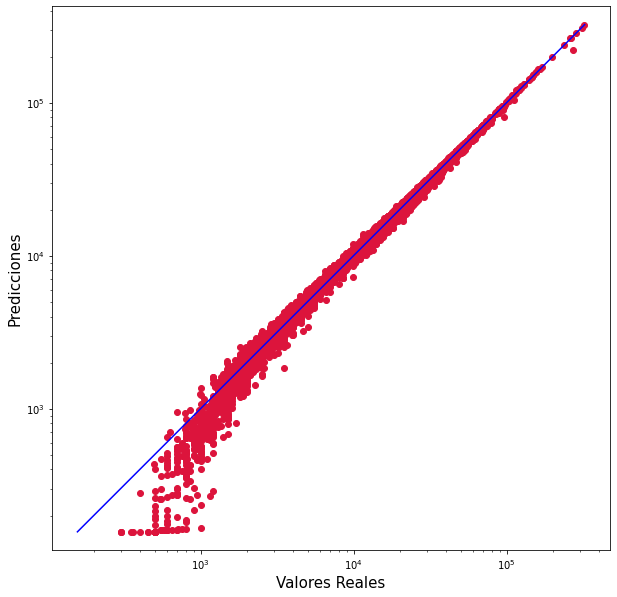

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(y_test.array, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test.array))
p2 = min(min(y_pred), min(y_test.array))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Valores Reales', fontsize=15)
plt.ylabel('Predicciones', fontsize=15)
plt.axis('equal')
plt.show()

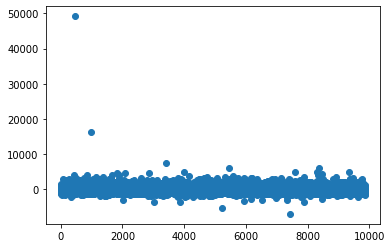

In [74]:
plt.plot(y_test.array - y_pred,marker='o',linestyle='')
plt.show()

### Entrenamiento con:

#### SVM de regresion

In [87]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler


Realizamos un entrenamiento con los valores de C y epsilon en default y no realizamos ninguna normalizacion de los valores.

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [83]:
X = datos_final.drop(["price","price_financed"],axis=1)
y = datos_final["price"]
X

,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,fuel_H’brido,fuel_No relevante,...,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VOLKSWAGEN,make_VOLVO
0,2000.0,227000.0,146.396388,4.0,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017.0,50071.0,82.000000,5.0,6.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016.0,103000.0,100.000000,4.0,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014.0,120000.0,140.000000,4.0,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2017.0,107000.0,130.000000,2.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2018.0,47000.0,140.000000,5.0,26.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,2015.0,68750.0,150.000000,2.0,30.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2019.0,21422.0,72.000000,5.0,17.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,2013.0,47900.0,450.000000,5.0,20.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv_SVR = cross_val_score(SVR(),X,y,cv=10)

In [ ]:
cv_SVR

In [88]:
## Normalizacion
scaler = StandardScaler()
X = datos_final.drop(["price","price_financed"],axis=1)
y = datos_final["price"]

df_transformed = scaler.fit_transform(X,y)
df_transformed = pd.DataFrame(df_transformed,index=datos_final.index, columns=datos_final.columns[:-2])
df_transformed

,price,price_financed,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,...,make_SEAT,make_SKODA,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM
0,-1.861563,1.049576,-0.001333,-0.582955,-0.910726,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
1,0.695599,-0.615999,-0.987479,0.569547,-0.830274,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
2,0.545177,-0.117736,-0.711833,-0.582955,-0.508469,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
3,0.244335,0.042299,-0.099286,-0.582955,-0.588920,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,3.132272,-0.129756
4,0.695599,-0.080081,-0.252422,-2.887958,-0.991177,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.846020,-0.644909,-0.099286,0.569547,0.778754,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49996,0.394756,-0.440159,0.053851,-2.887958,1.100560,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49997,0.996441,-0.885695,-1.140616,0.569547,0.054691,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49998,0.093913,-0.636437,4.647955,0.569547,0.296046,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756


In [89]:
x_transformed = df_transformed.drop(["price","price_financed"],axis=1)
y_transformed = df_transformed["price"]
x_transformed

,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,fuel_H’brido,fuel_No relevante,...,make_SEAT,make_SKODA,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM
0,-0.001333,-0.582955,-0.910726,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
1,-0.987479,0.569547,-0.830274,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
2,-0.711833,-0.582955,-0.508469,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
3,-0.099286,-0.582955,-0.588920,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,3.132272,-0.129756
4,-0.252422,-2.887958,-0.991177,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.099286,0.569547,0.778754,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49996,0.053851,-2.887958,1.100560,0.786625,-0.106755,-0.708418,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49997,-1.140616,0.569547,0.054691,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756
49998,4.647955,0.569547,0.296046,-1.271254,-0.106755,1.411595,-0.156119,-0.114907,-0.072782,-0.105092,...,-0.063152,-0.066,-0.044838,-0.070786,-0.014933,-0.021595,-0.179489,-0.004502,-0.319257,-0.129756


In [90]:
reg_SVR = cross_val_score(SVR(),x_transformed,y_transformed,cv=5)

In [91]:
reg_SVR

array([0.51805738, 0.52632213, 0.52870637, 0.5316962 , 0.53477738])

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

**RESUMEN:**
Malos resultados a la hora de realizar SVR se necesitan afinar los parametros C y epsilon, ademas es muy costoso.


**METRICAS**

In [109]:
y_pred_svr = cross_val_predict(SVR(),x_transformed,y_transformed,cv=5)

(49342,)

In [ ]:
y_pred2 = automl_con_make.predict(X_test)

In [ ]:
print("Metricas con MAE ",metrics.mean_absolute_error(y_test.array,y_pred))
print("Metricas con R2 score ",metrics.r2_score(y_test.array,y_pred))

Metricas con MAE  569.1688565938279
Metricas con R2 score  0.9265605107976149


In [141]:
print("Metricas con MAE ",metrics.mean_absolute_error(y_transformed,y_pred_svr))
print("Metricas con R2 score ",metrics.r2_score(y_transformed,y_pred_svr))
print("Puntuacion propia ",reg_SVR)

Metricas con MAE  9571.215379658155
Metricas con R2 score  0.5278942487498175
Puntuacion propia  [0.51805738 0.52632213 0.52870637 0.5316962  0.53477738]


In [119]:
metrics.r2_score(y_test.array,y_pred2)

NameError: ignored

In [ ]:
pd.Series(y_pred)

In [ ]:
y_test

In [ ]:
type(y_predecida)

#### Stochastic Gradient Descent

In [ ]:
## Elegimos este pues es util para conjuntos de entranamiento largos <10.000

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [129]:
X = datos_final.drop(["price","price_financed"],axis=1)
y = datos_final["price"]
X

,year,kms,power,doors,photos,fuel_DiŽsel,fuel_ElŽctrico,fuel_Gasolina,fuel_H’brido,fuel_No relevante,...,make_SMART,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VOLKSWAGEN,make_VOLVO
0,2000.0,227000.0,146.396388,4.0,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017.0,50071.0,82.000000,5.0,6.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016.0,103000.0,100.000000,4.0,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014.0,120000.0,140.000000,4.0,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2017.0,107000.0,130.000000,2.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2018.0,47000.0,140.000000,5.0,26.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,2015.0,68750.0,150.000000,2.0,30.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2019.0,21422.0,72.000000,5.0,17.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,2013.0,47900.0,450.000000,5.0,20.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# Reparto de datos en train y test (Buscamos predecir el precio que los coches van a tener)
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos_final.drop(["price","price_financed"],axis=1),
                                        datos_final['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [95]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) ## tolh hace parar cuando el fallo es mayor que eso

In [96]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [97]:
reg.score(X_test,y_test)

-11113954888761.201

#### Neural network models (supervised)

In [131]:
from sklearn.neural_network import MLPRegressor


In [133]:
# Reparto de datos en train y test (Buscamos predecir el precio que los coches van a tener)
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos_a_entrenar.drop(["price","price_financed"],axis=1),
                                        datos_a_entrenar['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [134]:
reg_RED_NEU = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [137]:
y_redes_pred = reg_RED_NEU.predict(X_test)

In [135]:
reg_RED_NEU.score(X_test,y_test)

0.806542147427316

In [ ]:
y_test

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets

X_train, X_test, y_train, y_test = train_test_split(
                                        datos_final.drop("price",axis=1),
                                        datos_final['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# Plot the training points
print()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
    else:
        Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=cm_bright,
        edgecolors="black",
        s=25,
    )
    # and testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        alpha=0.6,
        edgecolors="black",
        s=25,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        f"{score:.3f}".lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

In [ ]:
h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    print(X_train[:, 0])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

**METRICAS**

In [138]:
print("Metricas con MAE ",metrics.mean_absolute_error(y_test,y_redes_pred))
print("Metricas con R2 score ", metrics.r2_score(y_test,y_redes_pred))
print("Puntuacion propia ",reg_RED_NEU.score(X_test,y_test))

Metricas con MAE  3927.613518622499
Metricas con R2 score  0.806542147427316
Puntuacion propia  0.806542147427316


In [ ]:
####TODO: meter ruido cambiar objetivo no podemos predecir valores del mismo dataset cambiar predecir precios o otras
## todo: modificar fuel para dar los 4 primeros, (si quiero cambiar color igual que fuel)